# 0. Meta

## 0.1. Packages

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import viridis


## 0.2. Functions

# 1. Data import

The data originates from Kaggle, specifically the dataset titled ["Cars Germany"](https://www.kaggle.com/datasets/ander289386/cars-germany/data). Spanning from 2011 to 2021, the dataset encompasses information sourced from AutoScout24, one of Europe's major car markets for new and used vehicles. The data collection and scraping were facilitated by an automated tool developed at ZenRows, capturing essential details such as make, model, mileage, horsepower, and more.

In [8]:
df_raw = pd.read_csv("../data/raw/autoscout24.csv")

# 2. Initial Data exploration

## 2.1. Structure of Data

Shape and dimensions of raw data.

In [11]:
print(f"Shape of data: {df_raw.shape}")
print(f"Dimensionality of data: {df_raw.shape[0]/df_raw.shape[1]}")

Shape of data: (46405, 9)
Dimensionality of data: 5156.111111111111


Dimensionality: very low (n/p ~  5156).

## 2.2. Scale of Measure

Check for correct assignment of scales.

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


Scales are correctly assigned. However, "offerType" could be of scale "ordinal".Check unique levels of "offerType".

In [13]:
df_raw["offerType"].unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

The variable "offerType" represent an ordinal variable, as there is an implicit ranking order:

'Used'  < "Employee's car" < 'Demonstration' < 'Pre-registered' < 'New'

## 2.2. Missing Entries

Total number and proportion of missing entries.

In [14]:
total_rows_with_missing_values = df_raw.isnull().any(axis=1).sum()
print(f"Total number of rows with at least one missing entry: {total_rows_with_missing_values}")
print(f"Proportion of rows with at least one missing entry: {round(total_rows_with_missing_values/df_raw.shape[0]*100,2)}%")

Total number of rows with at least one missing entry: 334
Proportion of rows with at least one missing entry: 0.72%


Only very little amount of rows contain missing entries. 

Visualize missing values for each column with heatmap and bar charts.

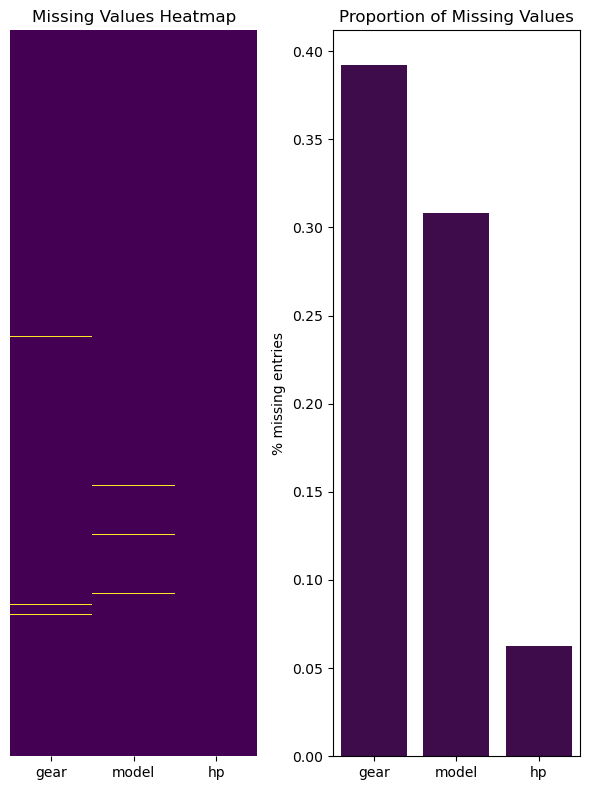

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(6, 8))

sns.heatmap(
    df_raw[df_raw.isnull().sum().sort_values(ascending=False).index]
        .loc[:, df_raw.isnull().sum().sort_values(ascending=False) > 0]
        .isnull(),
    cbar=False, cmap='viridis',
    yticklabels=False,
    ax=axes[0]  
)
axes[0].set_title('Missing Values Heatmap')


sns.barplot(
    x=df_raw.isnull().sum()[df_raw.isnull().sum() > 0].sort_values(ascending=False).index,
    y=(100*df_raw.isnull().sum()[df_raw.isnull().sum() > 0]/df_raw.shape[0]).sort_values(ascending=False),
    color=viridis(0),
    ax=axes[1]  
)
axes[1].set_title('Proportion of Missing Values')
axes[1].set_xlabel('')
axes[1].set_ylabel('% missing entries')

plt.savefig('../reports/figures/missing_entries.png')
plt.tight_layout()  
plt.show()

## 2.3. Categorial Variables

### 2.3.1. Counts per categorical level

### 2.3.2. Target distribution by categorical levels

## 2.4. Continuous Variables

### 2.4.1. Correlation

### 2.4.2. Linearity

### 2.4.3. Distribution

### 2.4.4. Outliers